In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from random import sample
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV

from __future__ import unicode_literals

%matplotlib inline
sns.set_context(context = 'talk')

D:\Anaconda\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
fd = pd.read_excel("FlightDelays.xls")
fd = fd.ix[:,0:-2]
fd['Count'] = 1

In [3]:
fd['DEP_TIME'] = fd['DEP_TIME'].astype(int)
fd['CARRIER'] = fd['CARRIER'].astype(str)
fd['DEST'] = fd['DEST'].astype(str)
fd['ORIGIN'] = fd['ORIGIN'].astype(str)
fd['DAY_WEEK'] = fd['DAY_WEEK'].astype(int)
fd['Weather'] = fd['Weather'].astype(int)
fd['Flight Status'] = fd['Flight Status'].astype(str)

In [4]:
fd.head()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status,Count
0,1455,OH,1455,JFK,184,2004-01-01,5935,BWI,0,4,1,N940CA,ontime,1
1,1640,DH,1640,JFK,213,2004-01-01,6155,DCA,0,4,1,N405FJ,ontime,1
2,1245,DH,1245,LGA,229,2004-01-01,7208,IAD,0,4,1,N695BR,ontime,1
3,1715,DH,1709,LGA,229,2004-01-01,7215,IAD,0,4,1,N662BR,ontime,1
4,1039,DH,1035,LGA,229,2004-01-01,7792,IAD,0,4,1,N698BR,ontime,1


D:\Anaconda\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


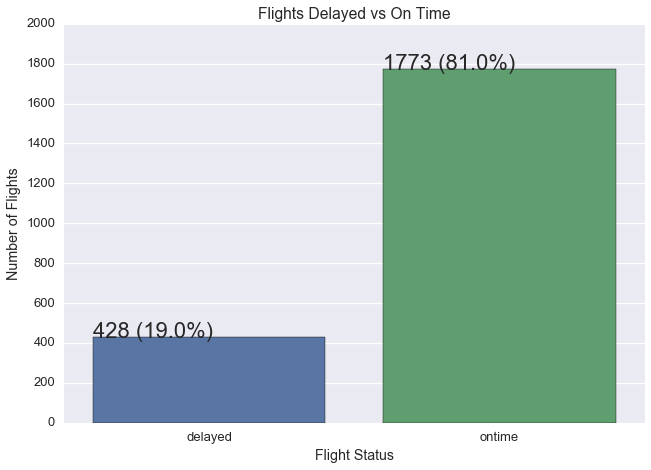

In [5]:
def plotHistogram():
    data = fd.groupby(by = 'Flight Status', as_index = False).count()
    total = np.sum(data['Count'])
    g = sns.barplot(x = 'Flight Status', y = 'Count', data = data)
    g.set_title('Flights Delayed vs On Time')
    g.set_yticks(np.arange(0, 2200, 200))
    g.set(ylabel = 'Number of Flights')
    for p in g.patches:
        g.text(p.get_x(), p.get_height(),
               '{} ({}%)'.format(int(p.get_height()), np.round(p.get_height()/total*100)),
               fontsize = 22)
plotHistogram()

In [6]:
def displayPercent():
    data = fd.groupby(by = 'CARRIER', as_index = False).count()[['CARRIER', 'Count']]
    data['Percent'] = np.round(data['Count']/np.sum(data['Count'])*100, 1)
    print(data)
    
displayPercent()

  CARRIER  Count  Percent
0      CO     94      4.3
1      DH    551     25.0
2      DL    388     17.6
3      MQ    295     13.4
4      OH     30      1.4
5      RU    408     18.5
6      UA     31      1.4
7      US    404     18.4


In [7]:
fd.groupby(by = ['DAY_WEEK', 'Flight Status'], as_index = False).count()[['DAY_WEEK', 'Flight Status', 'Count']]

,DAY_WEEK,Flight Status,Count
0,1,delayed,84
1,1,ontime,224
2,2,delayed,63
3,2,ontime,244
4,3,delayed,57
5,3,ontime,263
6,4,delayed,57
7,4,ontime,315
8,5,delayed,75
9,5,ontime,316


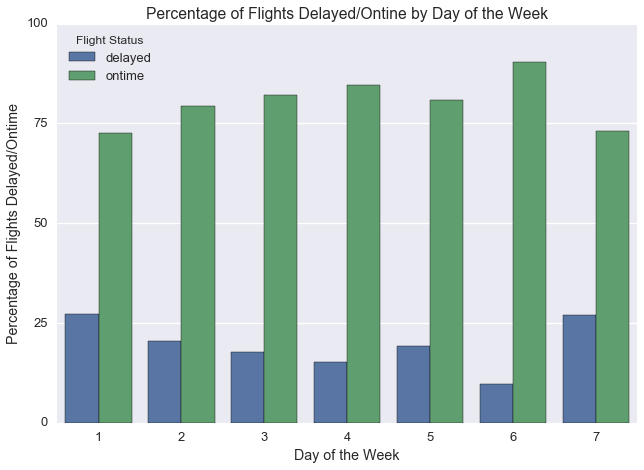

In [8]:
def plotPercentageWeek():
    data1 = fd.groupby(by = ['DAY_WEEK', 'Flight Status'], as_index = False).count()[['DAY_WEEK', 'Flight Status', 'Count']]
    data2 = fd.groupby(by = ['DAY_WEEK'], as_index = False).count()[['DAY_WEEK', 'Count']]
    data2.columns = ['DAY_WEEK', 'Percent']
    data3 = pd.merge(data1, data2, how = 'inner')
    data3['Percent'] = np.round(data3['Count']/data3['Percent']*100,2)
    g = sns.barplot(x = 'DAY_WEEK', y = 'Percent', data = data3, hue = 'Flight Status')
    g.set_title('Percentage of Flights Delayed/Ontine by Day of the Week')
    g.set_yticks(np.arange(0, 125, 25))
    g.set(ylabel = 'Percentage of Flights Delayed/Ontime', xlabel = 'Day of the Week')

plotPercentageWeek()

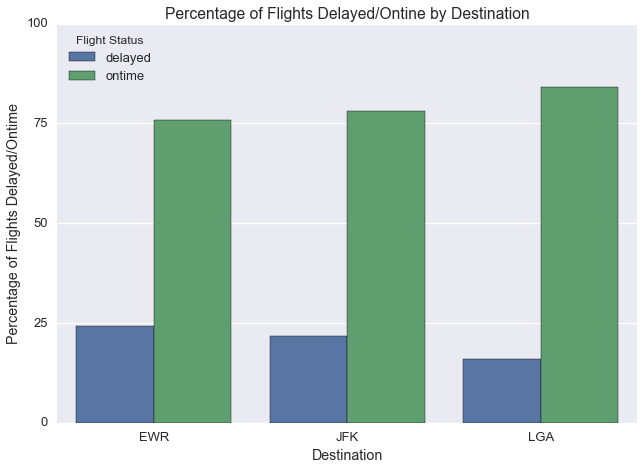

In [9]:
def plotPercentageDestination():
    data1 = fd.groupby(by = ['DEST', 'Flight Status'], as_index = False).count()[['DEST', 'Flight Status', 'Count']]
    data2 = fd.groupby(by = ['DEST'], as_index = False).count()[['DEST', 'Count']]
    data2.columns = ['DEST', 'Percent']
    data3 = pd.merge(data1, data2, how = 'inner')
    data3['Percent'] = np.round(data3['Count']/data3['Percent']*100,2)
    g = sns.barplot(x = 'DEST', y = 'Percent', data = data3, hue = 'Flight Status')
    g.set_title('Percentage of Flights Delayed/Ontine by Destination')
    g.set_yticks(np.arange(0, 125, 25))
    g.set(ylabel = 'Percentage of Flights Delayed/Ontime', xlabel = 'Destination')

plotPercentageDestination()

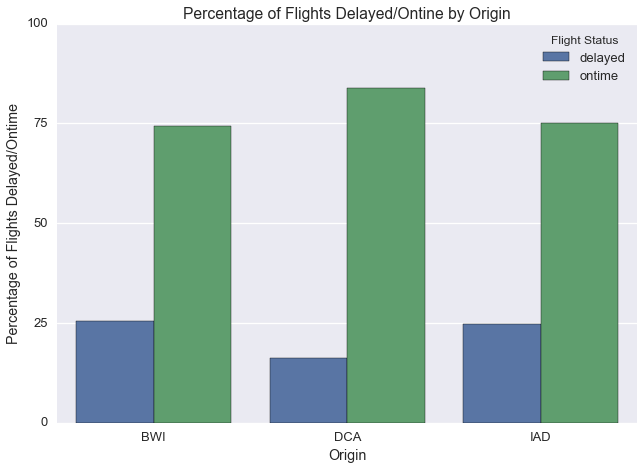

In [10]:
def plotPercentageOrigin():
    data1 = fd.groupby(by = ['ORIGIN', 'Flight Status'], as_index = False).count()[['ORIGIN', 'Flight Status', 'Count']]
    data2 = fd.groupby(by = ['ORIGIN'], as_index = False).count()[['ORIGIN', 'Count']]
    data2.columns = ['ORIGIN', 'Percent']
    data3 = pd.merge(data1, data2, how = 'inner')
    data3['Percent'] = np.round(data3['Count']/data3['Percent']*100,2)
    g = sns.barplot(x = 'ORIGIN', y = 'Percent', data = data3, hue = 'Flight Status')
    g.set_title('Percentage of Flights Delayed/Ontine by Origin')
    g.set_yticks(np.arange(0, 125, 25))
    g.set(ylabel = 'Percentage of Flights Delayed/Ontime', xlabel = 'Origin')

plotPercentageOrigin()

In [11]:
def dataProcess():
    def convertFlightStatus(status):
        if status == 'ontime':
            return 1
        else:
            return 0
    data = pd.get_dummies(fd[['CARRIER', 'DEST', 'ORIGIN']])
    data = data.join(pd.get_dummies(fd['DAY_WEEK'], prefix = 'DAY_WEEK'))
    data = data.join(pd.get_dummies(fd['DEP_TIME'].apply(lambda x: '{:04}'.format(x)[0:2]), prefix = 'HOUR_BLOCK'))
    data = data.join(fd[['Weather', 'Flight Status']])
    data['Flight_Status'] = data['Flight Status'].apply(lambda x: convertFlightStatus(x))
    data['Intercept'] = 1.0
    return data

In [13]:
dataProcess().head()

,CARRIER_CO,CARRIER_DH,CARRIER_DL,CARRIER_MQ,CARRIER_OH,CARRIER_RU,CARRIER_UA,CARRIER_US,DEST_EWR,DEST_JFK,...,HOUR_BLOCK_18,HOUR_BLOCK_19,HOUR_BLOCK_20,HOUR_BLOCK_21,HOUR_BLOCK_22,HOUR_BLOCK_23,Weather,Flight Status,Flight_Status,Intercept
0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,ontime,1,1
1,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,ontime,1,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,ontime,1,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,ontime,1,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,ontime,1,1


In [14]:
def getTrainingAndTestDataset(data, split = 0.8):
    train_idx = sample(data.index, int(split * len(data)))
    test_idx = data.index.difference(train_idx)
    train_data = data.ix[train_idx,:]
    test_data = data.ix[test_idx,:]
    return train_data, test_data

Different methods:

* `'newton'` $\Rightarrow$ Newton-Raphson __(Does not converge)__
* `'nm'` $\Rightarrow$ Nelder-Mead __(Does not converge)__
* `'bfgs'` $\Rightarrow$ Broyden-Fletcher-Goldfarb-Shanno (BFGS) __(Does not converge)__
* `'lbfgs'` $\Rightarrow$ Limited-memory BFGS with optional box constraint __(Does not converge)__
* `'powell'` $\Rightarrow$ Modified Powell's method  __(Converges after 6 iterations, results not consistent with Blog's)__
* `'cg'` $\Rightarrow$ Conjugate gradient  __(Does not converge)__
* `'ncg'` $\Rightarrow$ Newton-conjugate gradient __(Converges after 15 iterations, results not consistent with Blog's)__
* `'basinhopping'` $\Rightarrow$ global basin-hopping solver __(Converges but not compliant with blog's results)__

In [52]:
train_data, test_data = getTrainingAndTestDataset(dataProcess(), 0.6)
logit = sm.Logit(train_data['Flight_Status'], train_data.drop(['Flight_Status', 'Flight Status'], axis = 1))

In [53]:
result = logit.fit(method = 'powell', maxiter = 40)
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.410143
         Iterations: 6
         Function evaluations: 2984
                           Logit Regression Results                           
Dep. Variable:          Flight_Status   No. Observations:                 1320
Model:                          Logit   Df Residuals:                     1281
Method:                           MLE   Df Model:                           38
Date:                Mon, 14 Dec 2015   Pseudo R-squ.:                  0.1680
Time:                        17:02:37   Log-Likelihood:                -541.39
converged:                       True   LL-Null:                       -650.71
                                        LLR p-value:                 3.090e-27
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
CARRIER_CO        0.7499        nan        nan        nan        

In [61]:
len(train_data.drop(['Flight_Status', 'Flight Status', 'Intercept'], axis = 1).astype(int).values)

1320

In [58]:
lr_clf = LogisticRegression(500)
lr_clf.fit(train_data.drop(['Flight_Status', 'Flight Status', 'Intercept'], axis = 1).astype(int).values, train_data['Flight_Status'].astype(int).values)

AttributeError: 'int' object has no attribute 'lower'